## PROJECT 2 : Possible Loan Default Risk Flag

SISTEM KECERDASAN BISNIS - A

1. Roja' Putri Cintani - 4520210046
2. Febrianti Adhania - 4520210093
3. Zulfa Aenaeni - 4520210015
4. Syahrani Adrianty - 4520210034
5. Adila Apriliani - 4520210067

# **Mount, Library**

In [3]:
# mount Google Drive

from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns
sns.set_theme(style = "darkgrid")

init_notebook_mode(connected=True)
%matplotlib inline

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

import pickle

# **Data**

In [5]:
#Menginput data set item dan review

data_train = pd.read_csv("/content/gdrive/MyDrive/PossibleLoan/Training_Data.csv")
data_test = pd.read_csv("/content/gdrive/MyDrive/PossibleLoan/Test_Data.csv")

In [6]:
data_train.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [39]:
data_test.head()

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [9]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 28000 non-null  int64 
 1   Income             28000 non-null  int64 
 2   Age                28000 non-null  int64 
 3   Experience         28000 non-null  int64 
 4   Married/Single     28000 non-null  object
 5   House_Ownership    28000 non-null  object
 6   Car_Ownership      28000 non-null  object
 7   Profession         28000 non-null  object
 8   CITY               28000 non-null  object
 9   STATE              28000 non-null  object
 10  CURRENT_JOB_YRS    28000 non-null  int64 
 11  CURRENT_HOUSE_YRS  28000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.6+ MB


In [10]:
data_train.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


# **Cleaning Data**

In [11]:
# cek duplikat
data_train.duplicated().sum()

0

In [12]:
#cek missing value
data_train.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [13]:
#cek missing value
data_test.isnull().sum()

ID                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
dtype: int64

In [14]:
data_train_cleaned=data_train.drop(columns=["Id"])
data_test_cleaned=data_test.drop(columns=["ID"])


#Taking only the columns we need

data_train_con=data_train_cleaned[["Income","Age","Experience","CURRENT_JOB_YRS","CURRENT_HOUSE_YRS"]]
data_train_cat=data_train_cleaned[["Married/Single","House_Ownership","Car_Ownership","Profession","CITY","STATE"]]

data_test_con=data_test_cleaned[["Income","Age","Experience","CURRENT_JOB_YRS","CURRENT_HOUSE_YRS"]]
data_test_cat=data_test_cleaned[["Married/Single","House_Ownership","Car_Ownership","Profession","CITY","STATE"]]

target=data_train_cleaned[["Risk_Flag"]]

In [15]:
data_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB


In [16]:
#again check for the missing values
data_train_con.isnull().sum()

Income               0
Age                  0
Experience           0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
dtype: int64

In [17]:
#Unique values in categorical variables
for col in data_train_cat.columns:
    print(col,data_train_cat[col].nunique())

print(target.nunique())

Married/Single 2
House_Ownership 3
Car_Ownership 2
Profession 51
CITY 317
STATE 29
Risk_Flag    2
dtype: int64


# **Exploratory Data Analysis**

In [18]:
pd.set_option('display.float_format',lambda x:'%.5f' % x)
data_train_con.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,252000.00000,252000.00000,252000.00000,252000.00000,252000.00000
mean,4997116.66533,49.95407,10.08444,6.33388,11.99779
std,2878311.01361,17.06385,6.00259,3.64705,1.39904
min,10310.00000,21.00000,0.00000,0.00000,10.00000
25%,2503015.00000,35.00000,5.00000,3.00000,11.00000
50%,5000694.50000,50.00000,10.00000,6.00000,12.00000
75%,7477502.00000,65.00000,15.00000,9.00000,13.00000
max,9999938.00000,79.00000,20.00000,14.00000,14.00000


In [19]:
data_train_cleaned.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


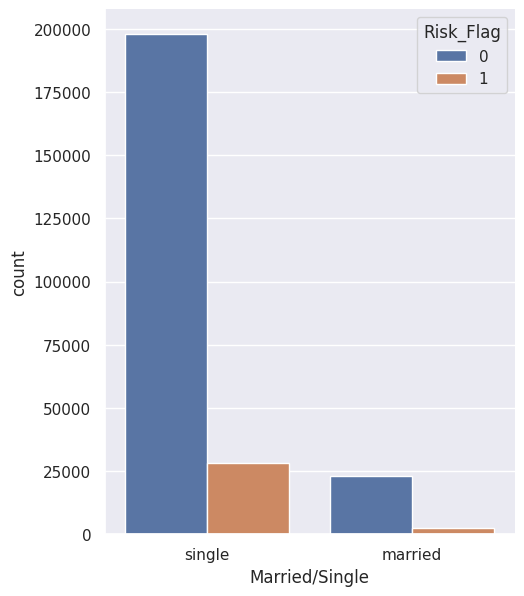

In [20]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(2,3)
ax_species = fig.add_subplot(gs[0,0])
sns.countplot(x='Married/Single', hue='Risk_Flag', data=data_train, ax=ax_species)
sns.despine()

Text(0.5, 1.0, 'Property Ownership')

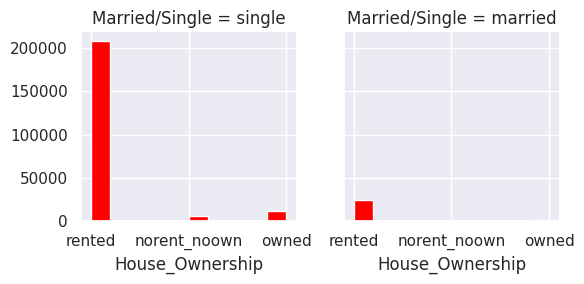

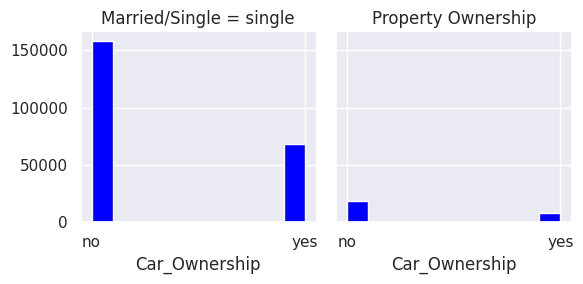

In [21]:
# Property Ownership w.r.t Marital Status

plot = sns.FacetGrid(data_train, col='Married/Single', margin_titles=True)
plot.map(plt.hist, 'House_Ownership', color='red')

plot = sns.FacetGrid(data_train, col='Married/Single', margin_titles=True)
plot.map(plt.hist, 'Car_Ownership', color='blue')

plt.title("Property Ownership")

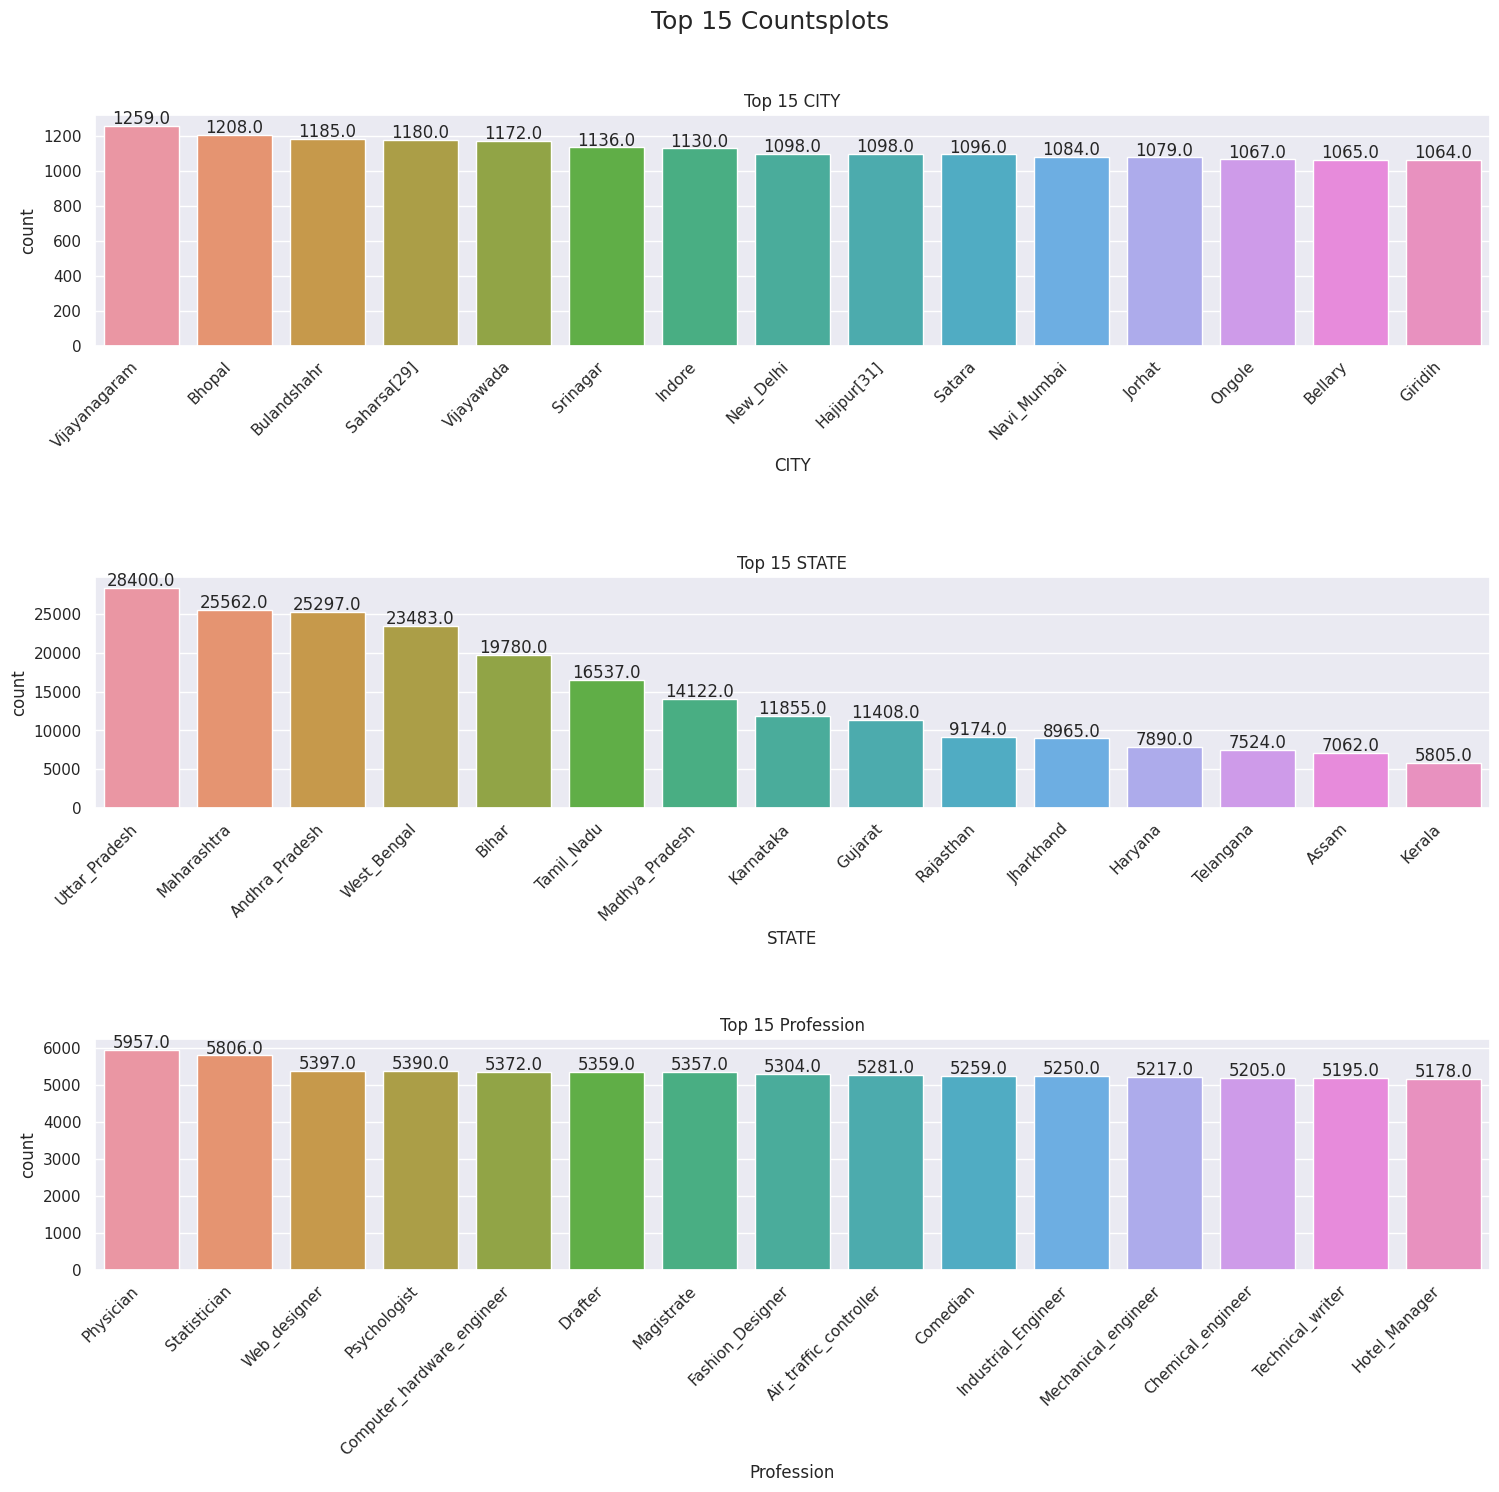

In [22]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(18, 15))
plt.subplots_adjust(hspace=1)
fig.suptitle("Top 15 Countsplots", fontsize=18, y=0.95)



for col , ax in zip(['CITY','STATE', 'Profession'] , axs.ravel()):
    countplot = sns.countplot(ax = ax ,data=data_train,  x= col , order=data_train[col].value_counts().iloc[:15].index)
    countplot.set_title("Top 15 "+ col)
    countplot.set_xticklabels(countplot.get_xticklabels(), rotation=45, horizontalalignment='right')
    for p in countplot.patches:
        countplot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.show()

<Axes: xlabel='CURRENT_JOB_YRS', ylabel='Experience'>

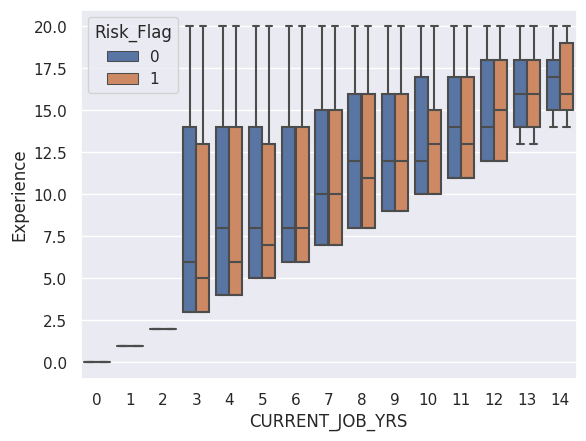

In [23]:
sns.boxplot(x='CURRENT_JOB_YRS',y='Experience',hue='Risk_Flag',data=data_train)

# **Convert Categorical Data to Numeric**

In [24]:
cols = ['Married/Single','Car_Ownership','Profession','CITY','STATE','Risk_Flag', 'House_Ownership']
le = preprocessing.LabelEncoder()
for col in cols:
    data_train_cleaned[col] = le.fit_transform(data_train_cleaned[col])


cols = ['Married/Single','Car_Ownership','Profession','CITY','STATE']
le = preprocessing.LabelEncoder()
for col in cols:
    data_test_cleaned[col] = le.fit_transform(data_test_cleaned[col])

In [25]:
data_train['Profession'].unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

In [26]:
data_train['CITY'].unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar',
       'Tiruchirappalli[10]', 'Jalgaon', 'Tiruppur', 'Jamnagar',
       'Kota[6]', 'Karimnagar', 'Hajipur[31]', 'Adoni', 'Erode[17]',
       'Kollam', 'Madurai', 'Anantapuram[24]', 'Kamarhati', 'Bhusawal',
       'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad', 'Ajmer',
       'Ongole', 'Miryalaguda', 'Ambattur', 'Indore', 'Pondicherry',
       'Shimoga', 'Chennai', 'Gulbarga', 'Khammam', 'Saharanpur',
       'Gopalpur', 'Amravati', 'Udupi', 'Howrah', 'Aurangabad[39]',
       'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar', 'Bellary', 'Danapur',
       'Purnia[26]', 'Bijapur', 'Patiala', 'Malda', 'Sagar', 'Durgapur',
       'Junagadh', 'Singrauli', 'Agartala', 'Thanjavur', 'Hindupur',
       'Naihati', 'North_Dumdum', 'Panchkula', 'Anantapur', 'Serampore',
       'Bathinda', 'Nadiad', 'Kanpur', 'Haridwar', 'Berhampur',
       'Jamshedpur', 'Hyderabad', 'Bidar', 'Kottayam', 'Solapur',
       'Suryapet', 'Aizawl', 'Asansol', 'Deoghar'

In [27]:
data_train['STATE'].unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

In [28]:
data_train_cleaned.corr()['Risk_Flag']

Income              -0.00309
Age                 -0.02181
Experience          -0.03452
Married/Single       0.02109
House_Ownership      0.02362
Car_Ownership       -0.02404
Profession          -0.00490
CITY                 0.00458
STATE               -0.00340
CURRENT_JOB_YRS     -0.01694
CURRENT_HOUSE_YRS   -0.00438
Risk_Flag            1.00000
Name: Risk_Flag, dtype: float64

In [29]:
corr=data_train_cleaned.corr()

<Axes: >

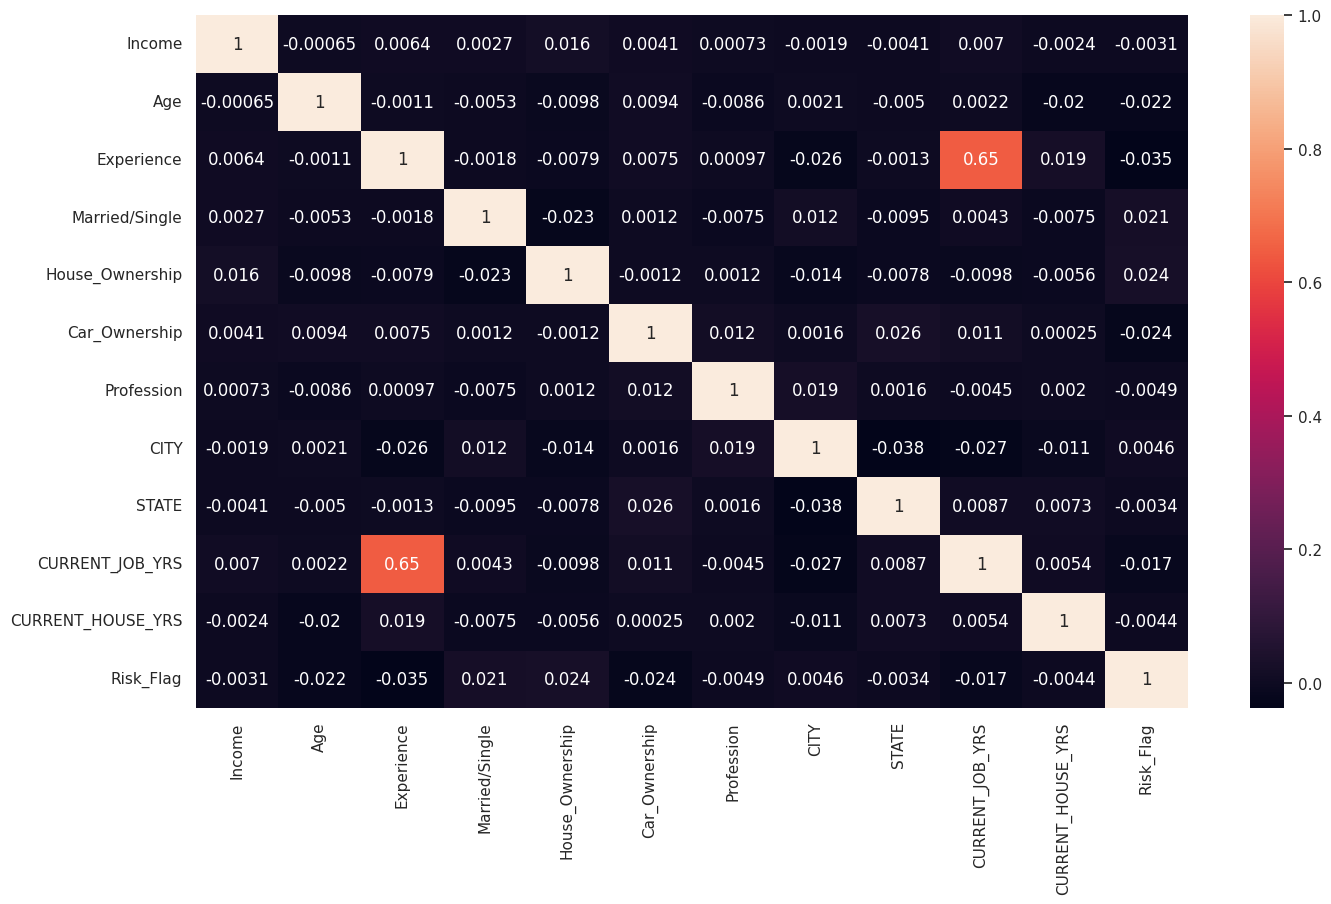

In [30]:
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True)

# **Splitting Data**

In [31]:
data_loan = data_train_cleaned
y = data_loan['Risk_Flag']
X = data_loan.drop(columns = ['Risk_Flag'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
223480,1759916,33,0,1,0,0,19,220,18,0,10
177039,1325345,66,8,1,2,0,23,193,25,8,14
85476,3971141,67,16,1,2,0,19,232,14,13,13
243408,2252102,33,8,1,2,0,32,254,13,8,11
116275,3770663,53,5,1,2,1,50,73,22,5,12
...,...,...,...,...,...,...,...,...,...,...,...
176963,9422918,77,11,1,2,0,42,24,14,9,13
117952,7716196,27,5,1,2,0,33,158,5,5,14
173685,2557871,55,14,1,2,1,6,86,1,3,12
43567,8914067,77,18,1,2,1,20,80,5,10,11


# **Scaling Data**

In [32]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

# **Model Fitting**

In [33]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy", max_depth = 20, random_state=100)
# With Scaling
model.fit(X_train_scale,y_train)
y_pred = model.predict(X_test_scale)
print("With Scaling: ",accuracy_score(y_test,y_pred))
print("-------------------------TEST SCORES-----------------------")
print(f"Recall: { recall_score(y_test, y_pred) }")
print(f"Precision: { precision_score(y_test, y_pred) }")
print(f"F1-Score: { f1_score(y_test, y_pred) }")
print(f"Accuracy score: { accuracy_score(y_test, y_pred) }")
print(f"AUC Score: { roc_auc_score(y_test, y_pred) }")

With Scaling:  0.8850992063492064
-------------------------TEST SCORES-----------------------
Recall: 0.45741735873636213
Precision: 0.5332194381169324
F1-Score: 0.49241826628100616
Accuracy score: 0.8850992063492064
AUC Score: 0.7009290187341857


In [34]:
comparison = pd.DataFrame({'actual value': y_test, 'predictive value': y_pred})

# Display the dataframe
display(comparison.head(10))

,actual value,predictive value
117955,0,0
89977,0,0
86851,0,0
225217,1,0
186118,0,1
251957,1,0
27277,0,0
139605,0,0
233071,0,0
1167,0,0


In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Load the trained model
model = DecisionTreeClassifier(criterion="entropy", max_depth = 20, random_state=100)
model.fit(X_train_scale,y_train)

# Sample user input
user_input = {
    'Income': 2955958,
    'Age': 35,
    'Experience': 17,
    'Married/Single': 'single',
    'House_Ownership': 'rented',
    'Car_Ownership': 'yes',
    'Profession': 'Computer operator',
    'CITY': 'Amravati',  # Change to user's input
    'STATE': 'Maharashtra',  # Change to user's input
    'CURRENT_JOB_YRS': 7,
    'CURRENT_HOUSE_YRS': 11
}

# Preprocess user input
user_input_encoded = {}
for col in data_test_con.columns:
    user_input_encoded[col] = user_input[col]  # No need for label encoding for continuous columns

for col in data_test_cat.columns:
    le = LabelEncoder()
    le.fit(data_test_cat[col])  # Use the categorical columns from training data
    user_input_encoded[col] = le.transform([user_input[col]])[0]

# Convert the encoded user input to DataFrame
user_input_df = pd.DataFrame([user_input_encoded])

# Predict using the trained model
predicted_risk_flag = model.predict(user_input_df)

# Print the result
print("Predicted Loan Risk:", predicted_risk_flag)

Predicted Loan Risk: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

